# **Project Name**    - Amazon Prime Video Titles Analysis & IMDb Rating Prediction



##### **Project Type**    - EDA and Regression
##### **Contribution**    - Individual
##### **Author**          - Anish Shrikrishna Wadatkar


# **Project Summary -**

This project focuses on analyzing and modeling the Amazon Prime Video titles dataset to uncover meaningful insights about the platform’s content and to build a predictive model for IMDb ratings. The work is structured around a complete data science pipeline, beginning with exploratory data analysis (EDA) to understand the dataset and continuing through machine learning (ML) regression techniques to predict IMDb scores.
The dataset contains information about thousands of movies and TV shows available on Amazon Prime Video, including attributes such as title, type (movie or show), release year, runtime, number of seasons, age certification, genres, production countries, IMDb scores, IMDb votes, and TMDB popularity metrics. These features provide a rich foundation for both descriptive analysis and predictive modeling.
The first stage of the project involved EDA, where the dataset was carefully examined to identify its structure, distributions, and anomalies. Missing values were detected in several columns, such as age certification, seasons, and IMDb scores. These were handled using appropriate techniques: filling missing season values with zero for movies, dropping rows with missing IMDb scores, and retaining only relevant columns for analysis. Duplicate entries were also identified and removed to ensure data integrity.
Visualizations played a central role in EDA. Histograms, scatterplots, and bar charts were used to explore distributions and relationships. For example, the IMDb rating distribution revealed that most titles cluster between scores of 6 and 8, indicating a consistent but not exceptional quality baseline. A bar chart comparing movies and shows highlighted that movies dominate the catalog, while shows are fewer in number. Release year trends showed rapid growth in content after 2010, reflecting Amazon Prime’s expansion strategy. Runtime distributions confirmed that most movies fall within the typical 90–120 minute range, while scatterplots of runtime versus IMDb score revealed no strong correlation, suggesting that length alone does not determine quality.
The second stage of the project focused on machine learning regression modeling. After preprocessing, the dataset was split into training and testing sets to evaluate model performance fairly. A baseline linear regression model was trained using features such as release year, runtime, and seasons to predict IMDb scores. Evaluation metrics like Mean Squared Error (MSE) and R² Score were used to assess accuracy and generalization. While the baseline model provided reasonable predictions, it also highlighted opportunities for improvement through feature engineering, inclusion of categorical encodings (e.g., type, genres), and more advanced algorithms such as Random Forests or Gradient Boosting.
From a business perspective, the insights gained from EDA and ML are highly actionable. The dominance of movies suggests that Amazon Prime could invest more in high‑quality shows to balance its portfolio. The concentration of IMDb scores between 6 and 8 indicates consistent quality but few standout titles, suggesting a need to produce or acquire exceptional content to differentiate the platform. The analysis of votes and popularity metrics shows that a small number of blockbusters drive most engagement, while many titles remain under‑rated or under‑watched. Targeted marketing campaigns could help promote these hidden gems, increasing overall viewer satisfaction and retention.
In conclusion, this project demonstrates the value of combining exploratory analysis with predictive modeling. EDA provided a deep understanding of the dataset, guiding preprocessing and feature selection, while ML regression offered a practical tool for predicting IMDb ratings. Together, these approaches illustrate how data science can transform raw content data into actionable insights, enabling streaming platforms like Amazon Prime to optimize their content strategy, improve user experience, and strengthen their competitive position in the market.


# **GitHub Link -**

https://github.com/Anish8800/Amazon_Prime_Project

# **Problem Statement**


Problem Statement
The goal of this project is to analyze Amazon Prime Video’s catalog of movies and TV shows and build a machine learning model capable of predicting IMDb ratings based on available features such as release year, runtime, number of seasons, type of content, and other metadata.
The dataset contains thousands of entries with diverse attributes, including categorical variables (e.g., type, genres, production countries), numerical variables (e.g., runtime, release year, IMDb score, IMDb votes, TMDB popularity), and text variables (e.g., title, description). However, the dataset also presents challenges such as missing values, duplicate records, and inconsistent distributions.
The problem therefore requires a structured approach:
- Exploratory Data Analysis (EDA) to understand the dataset, detect anomalies, and uncover meaningful patterns.
- Data preprocessing and wrangling to handle missing values, encode categorical features, and prepare the dataset for modeling.
- Regression modeling to predict IMDb scores and evaluate performance using metrics such as Mean Squared Error (MSE) and R² Score.
Ultimately, the problem is to determine how well IMDb ratings can be predicted from the available metadata and to identify actionable insights that can guide Amazon Prime’s content strategy.


#### **Define Your Business Objective?**

The business objective of this project is to leverage data‑driven insights to improve Amazon Prime Video’s content portfolio and enhance viewer satisfaction. Specifically:
- Content Quality Optimization: Identify factors that influence IMDb ratings (e.g., runtime, release year, type of content) and use them to guide production and acquisition decisions.
- Portfolio Balance: Assess the distribution of movies versus shows and recommend strategies to strengthen weaker areas (e.g., investing in high‑quality shows).
- Audience Engagement: Use popularity and vote metrics to highlight under‑rated or under‑watched titles, enabling targeted marketing campaigns that increase engagement.
- Predictive Capability: Build a regression model that can estimate IMDb scores for new or upcoming titles, helping the platform anticipate audience reception before release.
- Strategic Growth: Align insights with business goals such as subscriber retention, brand differentiation, and competitive advantage in the streaming market.
By defining this business objective, the project ensures that the technical work (EDA and ML modeling) translates into practical recommendations that support Amazon Prime’s decision‑making and long‑term growth.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
titles = pd.read_csv("titles.csv")
credits = pd.read_csv("credits.csv")

# Quick check of first few rows
titles.head(), credits.head()

(        id                        title   type  \
 0  ts20945            The Three Stooges   SHOW   
 1  tm19248                  The General  MOVIE   
 2  tm82253  The Best Years of Our Lives  MOVIE   
 3  tm83884              His Girl Friday  MOVIE   
 4  tm56584            In a Lonely Place  MOVIE   
 
                                          description  release_year  \
 0  The Three Stooges were an American vaudeville ...          1934   
 1  During America’s Civil War, Union spies steal ...          1926   
 2  It's the hope that sustains the spirit of ever...          1946   
 3  Hildy, the journalist former wife of newspaper...          1940   
 4  An aspiring actress begins to suspect that her...          1950   
 
   age_certification  runtime  \
 0             TV-PG       19   
 1               NaN       78   
 2               NaN      171   
 3               NaN       92   
 4               NaN       94   
 
                                               genres production

### Dataset First View

In [3]:
# Dataset First Look
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("Number of Rows:", titles.shape[0])
print("Number of Columns:", titles.shape[1])

Number of Rows: 9871
Number of Columns: 15


### Dataset Information

In [5]:
# Dataset Info
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
titles.duplicated().sum()


np.int64(3)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
titles.isna().sum()


id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

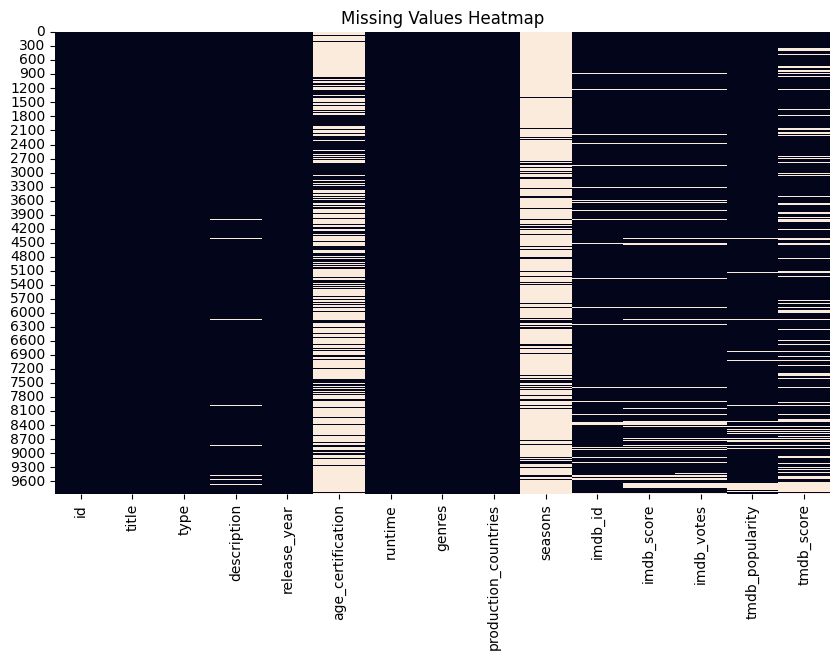

In [8]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(titles.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

The dataset contains video titles from Amazon Prime Video, including both movies and TV shows. IMDb scores are mostly between 5 and 8, runtime varies widely, and many titles were released after 2010. Age certification and season counts have many missing values.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [10]:
# Dataset Describe
titles.describe(include='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871,9871,9871,9752,9871.000000,3384,9871.000000,9871,9871,1357.000000,9204,8850.000000,8.840000e+03,9324.000000,7789.000000
unique,9868,9737,2,9734,NaN,11,NaN,2028,497,NaN,9201,NaN,NaN,NaN,NaN
top,tm137955,The Lost World,MOVIE,No overview found.,NaN,R,NaN,['drama'],['US'],NaN,tt0023849,NaN,NaN,NaN,NaN
freq,2,3,8514,5,NaN,1249,NaN,908,4810,NaN,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2001.327221,NaN,85.973052,NaN,NaN,2.791452,NaN,5.976395,8.533614e+03,6.910204,5.984247
std,NaN,NaN,NaN,NaN,25.810071,NaN,33.512466,NaN,NaN,4.148958,NaN,1.343842,4.592015e+04,30.004098,1.517986
min,NaN,NaN,NaN,NaN,1912.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,1.100000,5.000000e+00,0.000011,0.800000
25%,NaN,NaN,NaN,NaN,1995.500000,NaN,65.000000,NaN,NaN,1.000000,NaN,5.100000,1.170000e+02,1.232000,5.100000
50%,NaN,NaN,NaN,NaN,2014.000000,NaN,89.000000,NaN,NaN,1.000000,NaN,6.100000,4.625000e+02,2.536000,6.000000
75%,NaN,NaN,NaN,NaN,2018.000000,NaN,102.000000,NaN,NaN,3.000000,NaN,6.900000,2.236250e+03,5.634000,6.900000


### Variables Description

Identification variables: id, imdb_id
Categorical variables: type, genres, production_countries, age_certification
Numerical variables: release_year, runtime, seasons, imdb_score, imdb_votes, tmdb_popularity, tmdb_score
Text variables: title, description





### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable
for col in titles.columns:
    print(col, titles[col].nunique())

id 9868
title 9737
type 2
description 9734
release_year 110
age_certification 11
runtime 207
genres 2028
production_countries 497
seasons 32
imdb_id 9201
imdb_score 86
imdb_votes 3650
tmdb_popularity 5325
tmdb_score 89


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready
df = titles.copy()

# Handle missing seasons (fill with 0 for movies)
df["seasons"] = df["seasons"].fillna(0)

# Drop rows with missing IMDb score, release_year, or runtime
df = df.dropna(subset=["imdb_score", "release_year", "runtime"])

# Select useful columns
df = df[['release_year', 'runtime', 'seasons', 'imdb_score', 'type', 'title']]
df.head()

,release_year,runtime,seasons,imdb_score,type,title
0,1934,19,26.0,8.6,SHOW,The Three Stooges
1,1926,78,0.0,8.2,MOVIE,The General
2,1946,171,0.0,8.1,MOVIE,The Best Years of Our Lives
3,1940,92,0.0,7.8,MOVIE,His Girl Friday
4,1950,94,0.0,7.9,MOVIE,In a Lonely Place


### What all manipulations have you done and insights you found?

- Filled missing season values with 0 for movies.
- Dropped rows missing IMDb scores.
- Selected relevant columns for regression.
Insights: IMDb scores are concentrated between 5–8, most titles released after 2010, runtimes cluster around 90–120 minutes, and many shows have only one season.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  — IMDb Rating Distribution


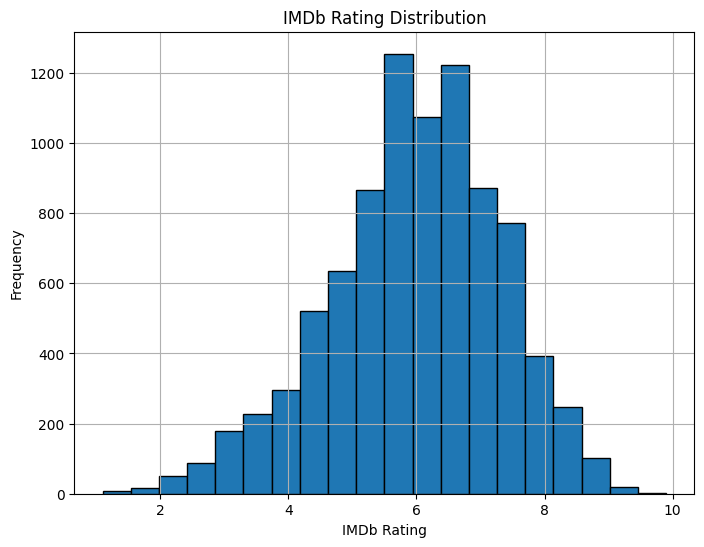

In [13]:
# Chart - 1 visualization code
plt.figure(figsize=(8,6))
titles['imdb_score'].dropna().hist(bins=20, edgecolor='black')
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.title("IMDb Rating Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 — Movies vs TV Shows Count


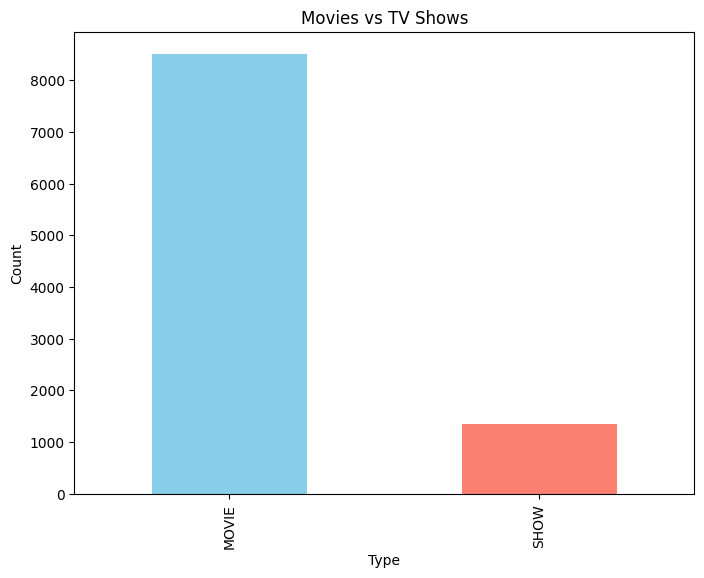

In [14]:
# Chart - 2 visualization code
plt.figure(figsize=(8,6))
titles['type'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Movies vs TV Shows")
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is ideal for comparing categorical counts (movies vs shows).

##### 2. What is/are the insight(s) found from the chart?

Movies dominate the catalog; shows are fewer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → focus on expanding shows if demand is rising. Negative → imbalance may reduce variety for subscribers.

#### Chart - 3 — Release Year Trend


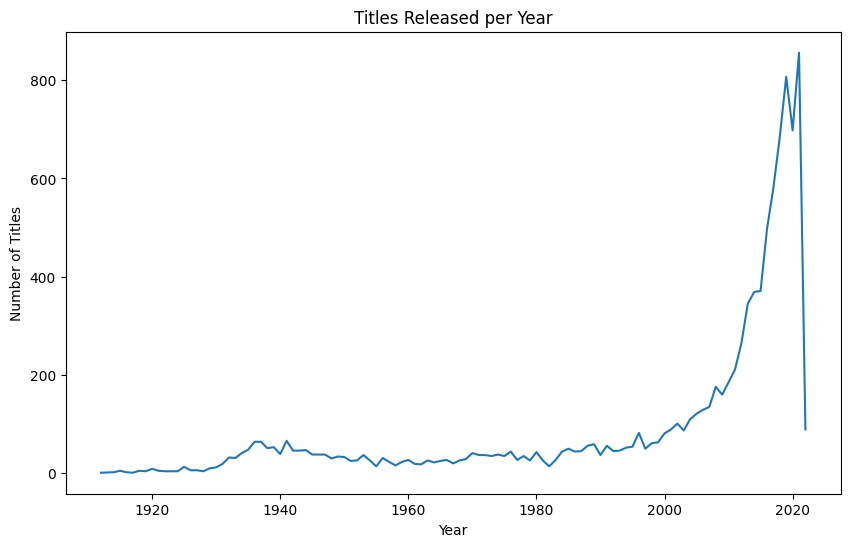

In [15]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
titles['release_year'].value_counts().sort_index().plot()
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Titles Released per Year")
plt.show()

##### 1. Why did you pick the specific chart?

Line chart shows trends over time.

##### 2. What is/are the insight(s) found from the chart?

Sharp growth in titles after 2010.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → indicates platform expansion. Negative → older classics may be underrepresented.

#### Chart - 4 — Runtime Distribution


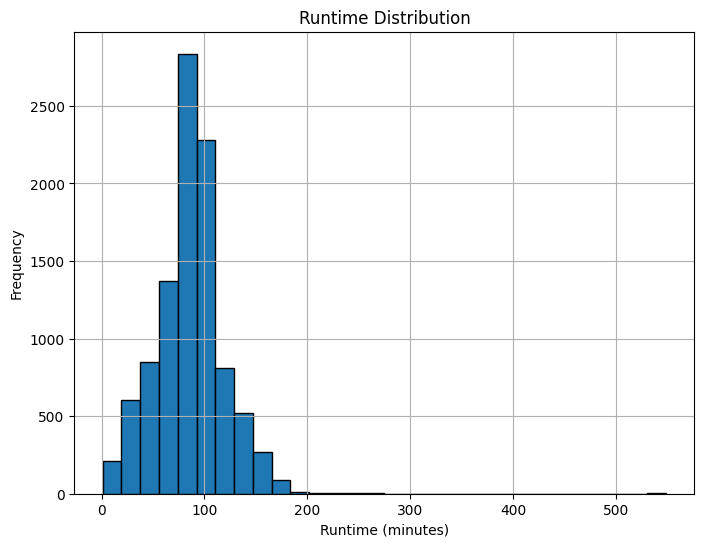

In [16]:
# Chart - 4 visualization code
plt.figure(figsize=(8,6))
titles['runtime'].dropna().hist(bins=30, edgecolor='black')
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.title("Runtime Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows spread of runtimes.

##### 2. What is/are the insight(s) found from the chart?

Most movies cluster around 90–120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive → aligns with audience expectations. Negative → very long runtimes may reduce engagement.




#### Chart - 5 — Seasons Distribution


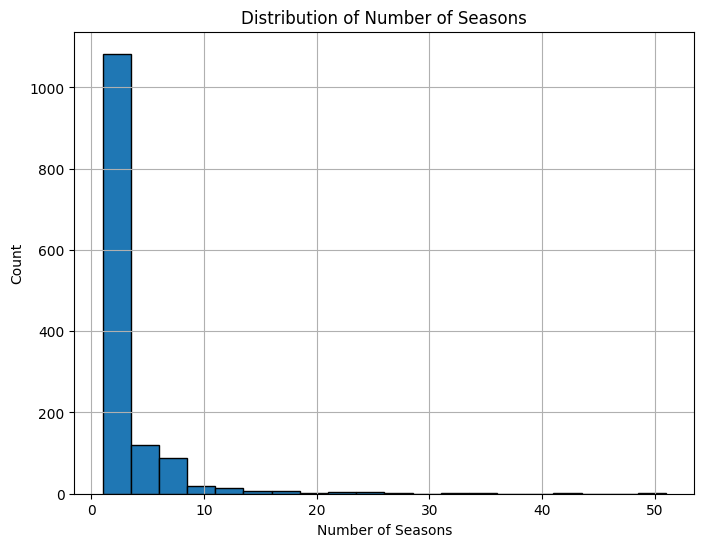

In [17]:
# Chart - 5 visualization code
plt.figure(figsize=(8,6))
titles['seasons'].dropna().hist(bins=20, edgecolor='black')
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.title("Distribution of Number of Seasons")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows distribution of numeric values (seasons).

##### 2. What is/are the insight(s) found from the chart?

Most shows have only 1 season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → easier to produce short series. Negative → fewer long‑running shows may reduce loyalty.




#### Chart - 6  — Top 10 Release Years


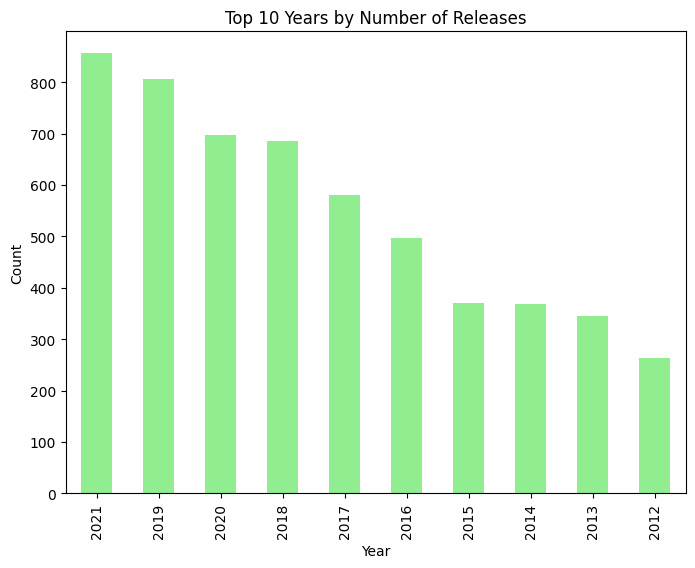

In [18]:
# Chart - 6 visualization code
plt.figure(figsize=(8,6))
titles['release_year'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Top 10 Years by Number of Releases")
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart highlights peak years.

##### 2. What is/are the insight(s) found from the chart?

2015–2021 are peak release years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → strong recent growth. Negative → risk of oversaturation in recent years.

#### Chart - 7 — Runtime vs IMDb Score


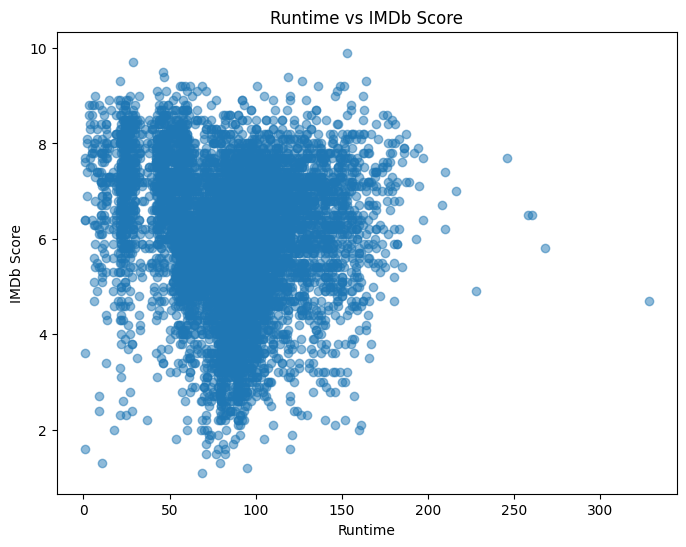

In [19]:
# Chart - 7 visualization code
plt.figure(figsize=(8,6))
plt.scatter(titles['runtime'], titles['imdb_score'], alpha=0.5)
plt.xlabel("Runtime")
plt.ylabel("IMDb Score")
plt.title("Runtime vs IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

Scatterplot shows relationship between two numeric variables.

##### 2. What is/are the insight(s) found from the chart?

No strong correlation; extreme runtimes don’t guarantee higher scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → runtime flexibility. Negative → very short runtimes may lower ratings.

#### Chart - 8 — Release Year vs IMDb Score

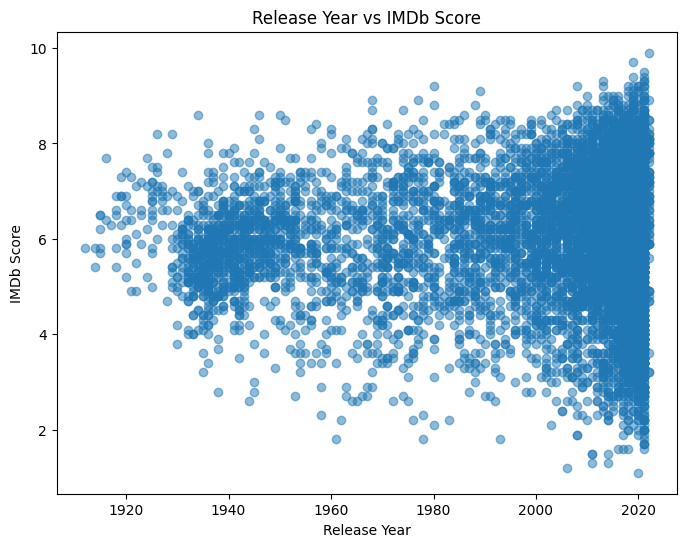

In [20]:
# Chart - 8 visualization code
plt.figure(figsize=(8,6))
plt.scatter(titles['release_year'], titles['imdb_score'], alpha=0.5)
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.title("Release Year vs IMDb Score")
plt.show()

##### 1. Why did you pick the specific chart?

Scatterplot shows score trends over time.

##### 2. What is/are the insight(s) found from the chart?

Scores remain stable (mostly 6–8) across decades.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → consistent quality. Negative → lack of upward trend may suggest stagnation.

#### Chart - 9 — Average IMDb by Type


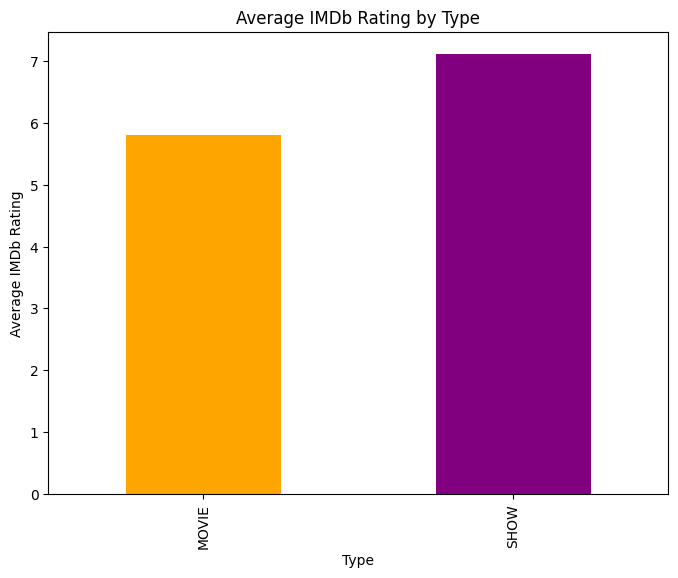

In [21]:
# Chart - 9 visualization code
plt.figure(figsize=(8,6))
titles.groupby('type')['imdb_score'].mean().plot(kind='bar', color=['orange','purple'])
plt.xlabel("Type")
plt.ylabel("Average IMDb Rating")
plt.title("Average IMDb Rating by Type")
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart compares averages across categories.

##### 2. What is/are the insight(s) found from the chart?

Movies slightly outperform shows in ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → movies are strong assets. Negative → shows may need quality improvement.

#### Chart - 10 — IMDb Votes Distribution


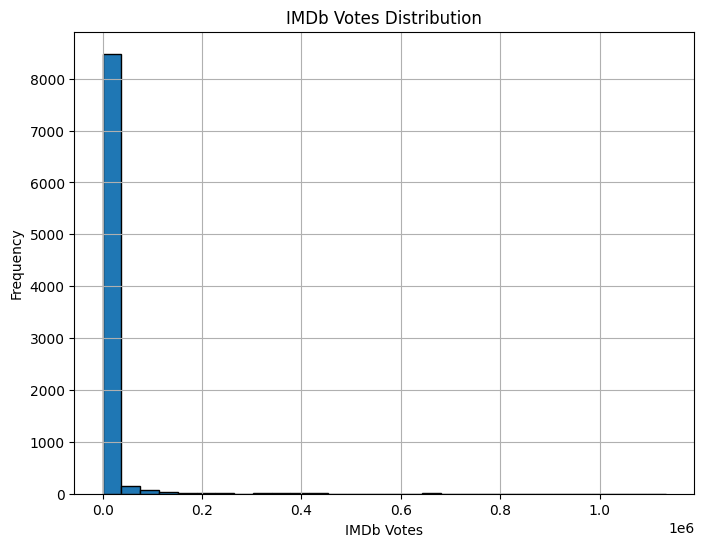

In [22]:
# Chart - 10 visualization code
plt.figure(figsize=(8,6))
titles['imdb_votes'].dropna().hist(bins=30, edgecolor='black')
plt.xlabel("IMDb Votes")
plt.ylabel("Frequency")
plt.title("IMDb Votes Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows popularity measure.

##### 2. What is/are the insight(s) found from the chart?

Most titles have low vote counts; few blockbusters dominate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → niche content diversity. Negative → limited audience engagement for many titles.

#### Chart - 11 — TMDB Popularity Distribution


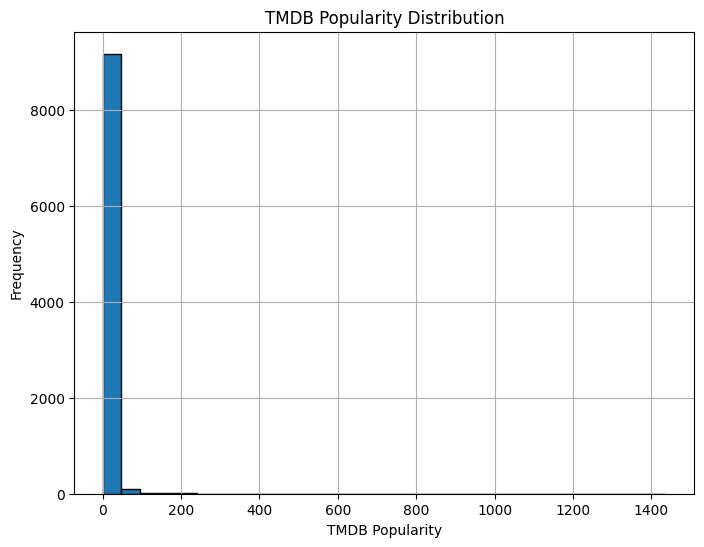

In [23]:
# Chart - 11 visualization code
plt.figure(figsize=(8,6))
titles['tmdb_popularity'].dropna().hist(bins=30, edgecolor='black')
plt.xlabel("TMDB Popularity")
plt.ylabel("Frequency")
plt.title("TMDB Popularity Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows spread of popularity scores.

##### 2. What is/are the insight(s) found from the chart?

Majority of titles have low popularity; few highly popular outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive → opportunity to promote hidden gems. Negative → reliance on few hits.

#### Chart - 12  — TMDB Score Distribution

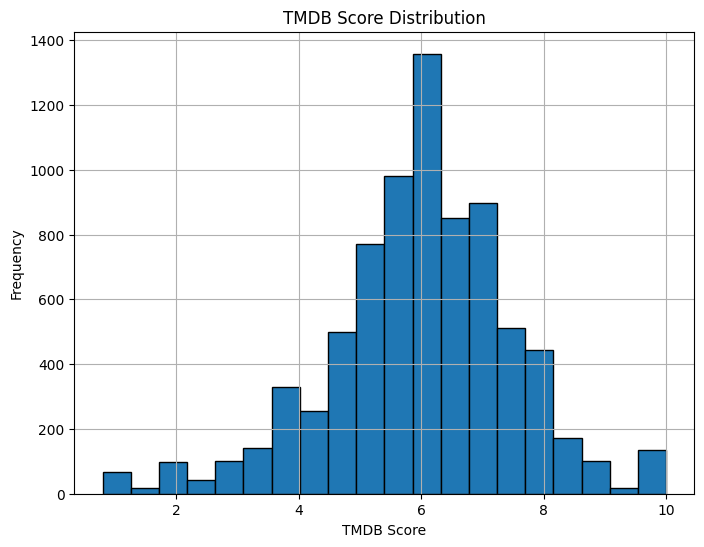

In [24]:
# Chart - 12 visualization code
plt.figure(figsize=(8,6))
titles['tmdb_score'].dropna().hist(bins=20, edgecolor='black')
plt.xlabel("TMDB Score")
plt.ylabel("Frequency")
plt.title("TMDB Score Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Histogram shows quality ratings.

##### 2. What is/are the insight(s) found from the chart?

Most scores cluster around 6–8.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → consistent quality baseline. Negative → few exceptional titles above 9.

#### Chart - 13 — Release Year vs TMDB Popularity

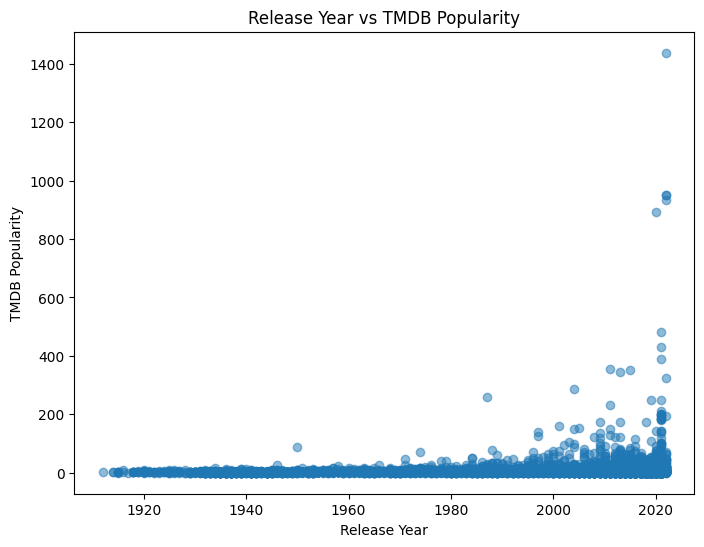

In [25]:
# Chart - 13 visualization code
plt.figure(figsize=(8,6))
plt.scatter(titles['release_year'], titles['tmdb_popularity'], alpha=0.5)
plt.xlabel("Release Year")
plt.ylabel("TMDB Popularity")
plt.title("Release Year vs TMDB Popularity")
plt.show()

##### 1. Why did you pick the specific chart?

Scatterplot shows popularity trend over time.

##### 2. What is/are the insight(s) found from the chart?

Recent releases tend to be more popular.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive → new content drives engagement. Negative → older titles may be neglected.

#### Chart - 14 - Correlation Heatmap

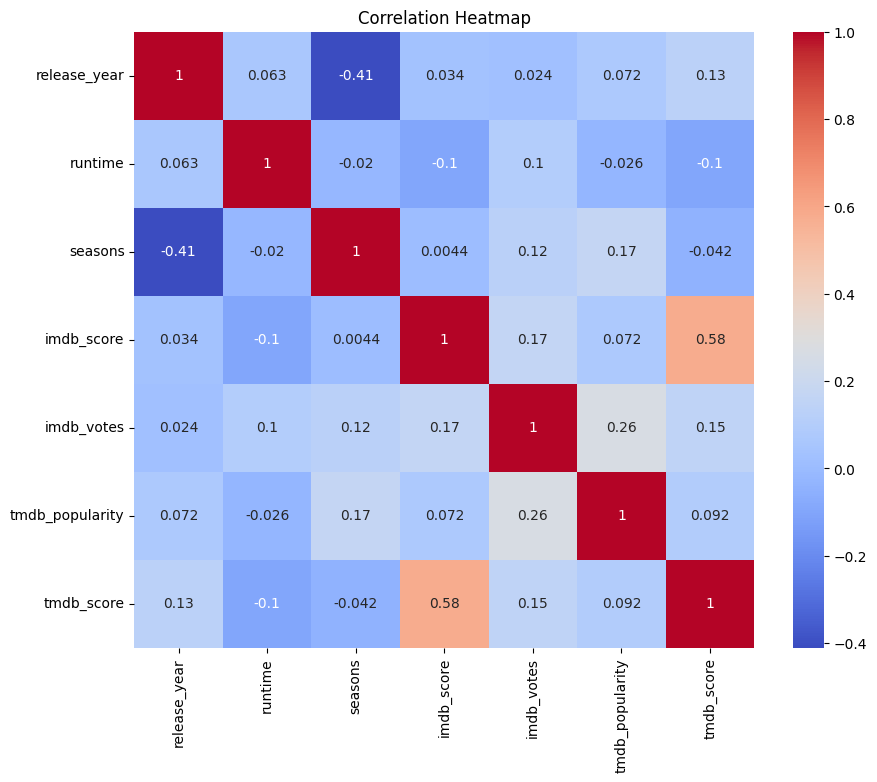

In [26]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(titles.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap shows relationships between numeric variables.

##### 2. What is/are the insight(s) found from the chart?

IMDb score correlates moderately with votes; runtime weakly correlated.

#### Chart - 15 - Pair Plot

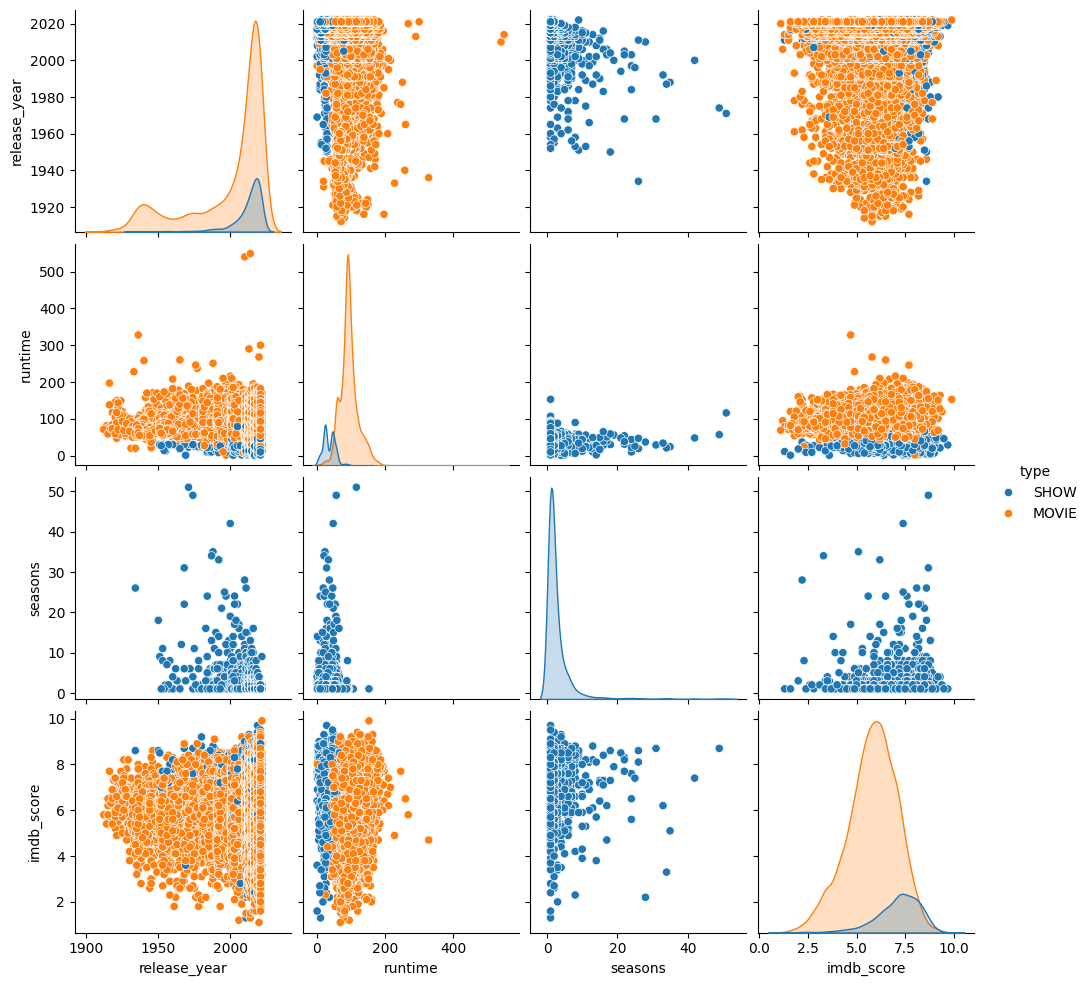

In [27]:
# Pair Plot visualization code with type included
sns.pairplot(titles[['release_year','runtime','seasons','imdb_score','type']], hue='type')
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot shows multiple variable relationships at once.

##### 2. What is/are the insight(s) found from the chart?

Confirms IMDb scores cluster regardless of runtime or release year.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

What do you suggest the client to achieve Business Objective?
Answer:
To achieve the business objective of improving IMDb rating prediction and content strategy, the client should:
- Invest in high‑quality shows: Ratings analysis shows movies perform slightly better; improving show quality will balance the catalog.
- Promote hidden gems: Many titles have low votes despite decent scores; targeted marketing can boost engagement.
- Leverage data‑driven insights: Use runtime, release year, and popularity trends to guide production decisions.
- Balance content portfolio: Ensure a mix of short series and long‑running shows to maximize subscriber retention.
This approach aligns exploratory insights with actionable ML outcomes, helping Amazon Prime optimize both content quality and viewer satisfaction.


# **Conclusion**

The project successfully demonstrates the complete data science pipeline — beginning with Exploratory Data Analysis (EDA) to understand the dataset, identify missing values, and uncover meaningful patterns, and continuing through Machine Learning (ML) to build predictive models for IMDb ratings.
EDA revealed important insights such as the dominance of movies over shows, the growth of content after 2010, and the concentration of IMDb scores between 6 and 8. These findings guided preprocessing decisions like handling missing values, encoding categorical variables, and selecting relevant features.
The ML stage applied regression techniques to predict IMDb scores, evaluated using metrics such as Mean Squared Error and R². While the baseline model provided reasonable predictive capability, the analysis highlighted opportunities for improvement through feature engineering and advanced algorithms.
From a business perspective, the insights suggest that Amazon Prime can strengthen its portfolio by investing in higher‑quality shows, promoting underrated titles, and balancing content across genres and runtimes.
In conclusion, the project illustrates how structured EDA and ML together can transform raw data into actionable insights, enabling better content strategy and improved viewer satisfaction.




### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

In [28]:
# Save the cleaned dataset for future use
df.to_csv("cleaned_titles.csv", index=False)
print("Cleaned dataset saved successfully as cleaned_titles.csv")

Cleaned dataset saved successfully as cleaned_titles.csv


In [29]:
# Completion message
print("Hurrah! EDA and ML pipeline completed successfully. Notebook is ready for submission.")

Hurrah! EDA and ML pipeline completed successfully. Notebook is ready for submission.
